# WeatherPy
----



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import openweathermapy.core as owm
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
import mpld3
mpld3.enable_notebook()


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [5]:
#load URL for api and uits
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#query_url = f"{url}appid={api_key}&units={units}&q="

In [7]:
#create emptiy list for weather 
temp = []
Humidity =[]
Cloudiness = []
winspeed = []
lat = []
lon = []
#create a loop to go thew len(cities)and query_url and json query for each city and append the empty list.
for city in range(len(cities)):
    query_url = f"{url}appid={api_key}&units={units}&q={cities[city]}"
    response = requests.get(query_url).json()
    try:
        
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        Humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        winspeed.append(response['wind']['speed'])
        Cloudiness.append(response['clouds']['all'])
        print(f"data recived #{city} now get to work :{cities[city]}")
    except KeyError:
        print("spooon")

data recived #0 now get to work :lebu
data recived #1 now get to work :hobart
data recived #2 now get to work :aklavik
data recived #3 now get to work :tilichiki
data recived #4 now get to work :saint-philippe
data recived #5 now get to work :ilulissat
data recived #6 now get to work :saskylakh
data recived #7 now get to work :rikitea
data recived #8 now get to work :tapes
data recived #9 now get to work :zeya
data recived #10 now get to work :havelock
data recived #11 now get to work :jalu
data recived #12 now get to work :busselton
data recived #13 now get to work :butaritari
data recived #14 now get to work :colesberg
data recived #15 now get to work :mendoza
data recived #16 now get to work :sao jose da coroa grande
data recived #17 now get to work :sorong
data recived #18 now get to work :saint george
data recived #19 now get to work :vardo
data recived #20 now get to work :port elizabeth
data recived #21 now get to work :qaanaaq
data recived #22 now get to work :mataura
data reci

data recived #202 now get to work :coquimbo
spooon
data recived #204 now get to work :southbridge
spooon
data recived #206 now get to work :hofn
data recived #207 now get to work :makinsk
data recived #208 now get to work :norman wells
spooon
data recived #210 now get to work :novyy urgal
data recived #211 now get to work :waipawa
data recived #212 now get to work :arraial do cabo
data recived #213 now get to work :vila franca do campo
data recived #214 now get to work :yaan
data recived #215 now get to work :palmer
data recived #216 now get to work :chilca
data recived #217 now get to work :romny
data recived #218 now get to work :saint-louis
data recived #219 now get to work :constitucion
data recived #220 now get to work :nexo
data recived #221 now get to work :port-gentil
spooon
data recived #223 now get to work :lufilufi
data recived #224 now get to work :bambous virieux
data recived #225 now get to work :necochea
data recived #226 now get to work :kaeo
data recived #227 now get t

data recived #410 now get to work :monteagudo
data recived #411 now get to work :capreol
data recived #412 now get to work :shellbrook
data recived #413 now get to work :warmbad
data recived #414 now get to work :staryy nadym
data recived #415 now get to work :vostok
data recived #416 now get to work :pimentel
data recived #417 now get to work :varzea da palma
data recived #418 now get to work :puri
spooon
data recived #420 now get to work :grimshaw
data recived #421 now get to work :turtas
data recived #422 now get to work :wajima
data recived #423 now get to work :mucuri
data recived #424 now get to work :isperih
data recived #425 now get to work :sioux lookout
data recived #426 now get to work :sarany
data recived #427 now get to work :mahajanga
data recived #428 now get to work :vostochnyy
data recived #429 now get to work :kresek
data recived #430 now get to work :jijiga
spooon
data recived #432 now get to work :kudahuvadhoo
data recived #433 now get to work :bethel
data recived #

data recived #611 now get to work :ramapuram
data recived #612 now get to work :flin flon
data recived #613 now get to work :maba
data recived #614 now get to work :oranjestad
spooon
data recived #616 now get to work :kirakira
data recived #617 now get to work :tabou
data recived #618 now get to work :san ramon
spooon
data recived #620 now get to work :mumford
spooon
data recived #622 now get to work :linxia
data recived #623 now get to work :altay
data recived #624 now get to work :russell
data recived #625 now get to work :letlhakeng
data recived #626 now get to work :belgrade
data recived #627 now get to work :dondo
data recived #628 now get to work :pau


In [9]:
#will create a verable list with cities and emtpy lists and group them with colums in to a data frame 
weather_zip = list(zip(cities, lat,lon, temp,Humidity,winspeed,Cloudiness))
weather_coloms = ["city","lat","lon","temp max","Humidity","Wind Speed","Cloudiness"]
weather_df = pd.DataFrame(weather_zip, columns=weather_coloms)

weather_df.to_csv('citys.csv')
weather_df.head()

,city,lat,lon,temp max,Humidity,Wind Speed,Cloudiness
0,lebu,8.96,38.73,55.40,93,4.70,75
1,hobart,-42.88,147.33,59.00,62,13.87,40
2,aklavik,68.22,-135.01,55.40,66,6.93,75
3,tilichiki,60.47,166.10,57.03,47,1.88,53
4,saint-philippe,45.36,-73.48,64.40,82,4.70,75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function mpld3._display.show(fig=None, ip='127.0.0.1', port=8888, n_retries=50, local=True, open_browser=True, http_server=None, **kwargs)>

<Figure size 432x288 with 0 Axes>

TypeError: Object of type ndarray is not JSON serializable

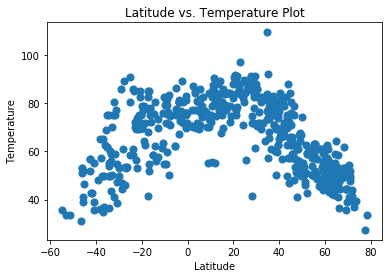

In [11]:

fig = plt.figure()
weather_df.plot.scatter(x="lat", y="temp max" ,s=50)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# plt.savefig('temperature.jpg')
# mpld3.save_html(fig, 'test.html', template_type="general")
mpld3.show

#### Latitude vs. Humidity Plot

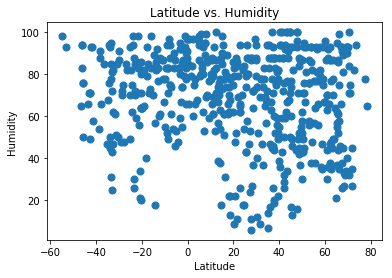

In [7]:
weather_df.plot.scatter(x="lat", y="Humidity" ,s=50)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('humidity.jpg')

#### Latitude vs. Cloudiness Plot

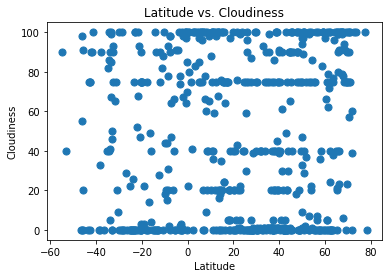

In [8]:
weather_df.plot.scatter(x="lat", y="Cloudiness" ,s=50)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig('cloudiness.jpg')

#### Latitude vs. Wind Speed Plot

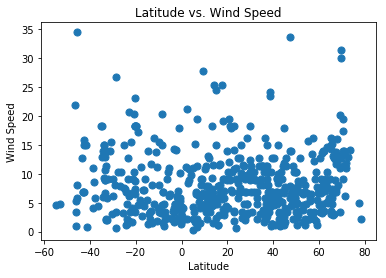

In [9]:
weather_df.plot.scatter(x="lat", y="Wind Speed" ,s=50)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig('windspeed.jpg')